# Intracranial Hemorrhage Detection : Demonstration Notebook

*Given a CT scan slice of a patient's cranium, detect whether a hemorrhage is present or not and also try to specify the type of hemorrhage(s) if any.*

## 0. Initialize this notebook with all necessary imports


In [1]:
import os
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from random import sample as rsample
import demonstration_utils as du

In [2]:
%matplotlib inline

## 1. Specify the trained model directory and case input directory

In [3]:
input_dir = 'D:/Shashank/MajorProjectSem6/Very Small Split - Images/test_very_small/'
trained_model_dir = 'D:/Shashank/MajorProjectSem6/Latest working/'

## 2. Find and load the trained model (latest)

In [4]:
assert os.path.exists(trained_model_dir + 'model_trained_last.h5'), f"Trained model is not present in {trained_model_dir}"
model = load_model(trained_model_dir + 'model_trained_last.h5') # load the trained model

## 3. Select a patient at random for demonstration

In [5]:
case = rsample(os.listdir(input_dir), 1)[0] # a case is selected at random from the input directory
caseID = case[:-4]

## 4. Show the selected patient's CT Scan slice

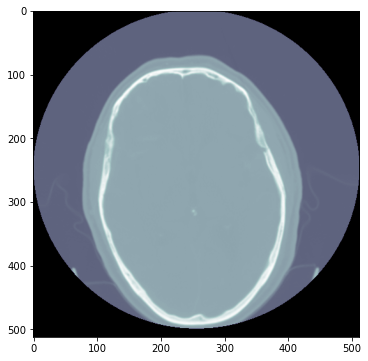

In [6]:
linear_transformed_case = du.apply_linear_transform(input_dir + case)
plt.figure(figsize=(6, 6))
plt.imshow(linear_transformed_case, cmap=plt.cm.bone)
plt.show()

## 5. Normalize the CT scan slice before feeding it to the neural network

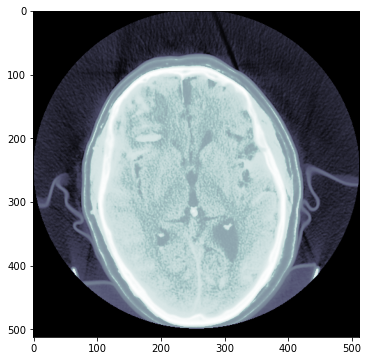

In [7]:
normalized_case = du.normalize_with_histogram_scaling(linear_transformed_case)
plt.figure(figsize=(6, 6))
plt.imshow(normalized_case, cmap=plt.cm.bone)
plt.show()

## 6. Check for hemorrhage

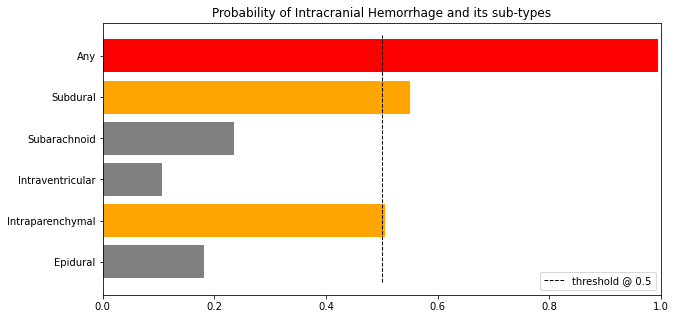

In [8]:
prediction = model.predict(normalized_case[None, :, :, None])
plt.figure(figsize=(10, 5))
plt.xlim(0, 1)
labels = ['Epidural', 'Intraparenchymal', 'Intraventricular', 'Subarachnoid', 'Subdural', 'Any']
colors = du.get_color_list(np.squeeze(prediction))
plt.barh(labels, np.squeeze(prediction), color=colors)
plt.plot([0.5, 0.5], [-0.5, 5.5], linestyle='dashed', color='black', linewidth='1', label='threshold @ 0.5')
plt.legend()
plt.title('Probability of Intracranial Hemorrhage and its sub-types')
plt.show()

## 7. Show patient report

In [9]:
print(du.generate_patient_report(np.squeeze(prediction), caseID))

Report for CASE ID : ID_6729b0898

+-----------------+-------------+
| Hemorrhage Type | Probability |
+-----------------+-------------+
|Epidural         |   0.18141954|
+-----------------+-------------+
|Intraparenchymal |   0.50625122|
+-----------------+-------------+
|Intraventricular |   0.10631185|
+-----------------+-------------+
|Subarachnoid     |   0.23444971|
+-----------------+-------------+
|Subdural         |   0.55152816|
+-----------------+-------------+
|Any              |   0.99604934|
+-----------------+-------------+

** This report is generated using a complex computer algorithm.
** No medical decisions should be based solely on this report.
** Exercise extreme caution.
